In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### time stamp 데이터 생성

In [3]:
X = []
Y = []

for i in range(6):

    lst = list(range(i, i+4))

    X.append(list(map(lambda c : [c/10], lst)))
    Y.append((i + 4) / 10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


### simple RNN
- input_shape=[4, 1] : timestpes = 4, input_dim = 1
- units = simple RNN 레이어에 존재하는 뉴런의 수(=메모리셀의 수)
### return_sequences
- True로 설정하면 레이어는 각 타임스텝(time step)마다의 출력을 반환, 입력 시퀀스의 각 타임스텝에 대한 출력이 포함된 시퀀스를 반환
- return_sequences=True는 주로 다수의 시퀀스 출력이 필요한 경우에 사용되며 다음 레이어로 전달되는 시퀀스 데이터가 필요한 경우에 유용
- False로 설정하면 레이어는 마지막 타임스텝의 출력만 반환, 입력 시퀀스에 대한 하나의 출력만 반환
- return_sequences=False는 주로 다음 레이어로 전달되는 단일 출력이 필요한 경우에 사용

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131 (524.00 Byte)
Trainable params: 131 (524.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


![](2024-02-08-19-11-47.png)
- 여기서 return_sequences=False 이므로 h0, h1, h2는 사용하지 않고 최종적으로 h3와 값의 오차만을 계산

### 학습

In [ ]:
model.fit(X, Y, epochs=100, verbose=0)

### 예측

In [ ]:
model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]]))

1/1 [==============================] - 0s 104ms/step


array([[0.800046]], dtype=float32)

In [ ]:
model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]]))

1/1 [==============================] - 0s 16ms/step


array([[0.13807464]], dtype=float32)

### 복잡한 모델 구성 후 학습 및 예측

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=True, input_shape=[4, 1]),
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4, 1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, 4, 10)             120       
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 4, 10)             210       
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 4, 10)             210       
                                                                 
 simple_rnn_17 (SimpleRNN)   (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 761 (2.97 KB)
Trainable params: 761 (2.97 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100


1/1 [==============================] - 2s 2s/step - loss: 2.0401
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 1.7970
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 1.5637
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.3417
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 1.1327
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 0.9384
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 0.7604
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6003
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.4595
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 0.3393
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 0.2404
Epoch 12/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1631
Epoch 13/100
1/1 [==============================] - 0s 7ms/step - loss: 

In [ ]:
model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]]))

1/1 [==============================] - 0s 270ms/step


array([[0.7825371]], dtype=float32)

### simple RNN의 단점
- 입력 데이터가 길어지면 학습 능력이 떨어진다 -> Long-Term-Dependency 문제
- 현재의 답을 얻기 위해 과거의 정보에 의존해야되는 RNN이지만,
- 과거 시점이 현재와 너무 떨어지면 문제 풀이가 어려움

### LSTM
![](2024-02-08-19-49-00.png)
- simple RNN의 장기 의존성 문제를 해결하기 위한 알고리즘
- time step을 가로지르며 셀 상태가 보존
- 모델을 명시적으로 나열한 개념

![](2024-02-08-19-48-16.png)
- 셀 상태(Cell State): LSTM은 셀 상태라고 불리는 중요한 메모리 유닛을 사용합니다.
    - 셀 상태는 네트워크를 통해 전달되는 정보 흐름을 조절하며, 장기적인 의존성을 학습하는 데 도움이 됩니다.
- 장기 의존성 모델링: LSTM은 장기적인 시간 의존성을 학습하는 데 강력합니다.
    - 이전 타임스텝에서 발생한 정보를 적절하게 보존하고 활용하여 긴 시퀀스 데이터를 처리할 수 있습니다.

![](2024-02-08-19-56-26.png)
- 게이트(Gate) 메커니즘: LSTM은 게이트라는 구조를 사용하여 정보의 흐름을 제어합니다.
    - 주요 게이트에는 입력 게이트(Input Gate), 삭제 게이트(Forget Gate), 출력 게이트(Output Gate)가 있습니다.
    - 이 게이트들은 현재 입력 및 이전 상태에 대한 정보를 기반으로 셀 상태를 업데이트하고 출력을 생성합니다.

![](2024-02-08-19-56-44.png)
- 삭제 게이트(Forget Gate):
    - 삭제 게이트는 이전 시간 단계의 셀 상태를 얼마나 유지할지를 결정합니다.
    - 삭제 게이트는 시그모이드 함수를 사용하여 이전 셀 상태의 각 요소가 유지될 비율을 결정하는 값(0과 1 사이)을 출력합니다.
    - 이 값은 이전 셀 상태의 각 요소에 곱해져서 어떤 정보를 유지하고 어떤 정보를 삭제할지 결정합니다.

![](2024-02-08-19-57-09.png)
- 입력 게이트(Input Gate):
    - 입력 게이트는 현재 입력 데이터가 셀 상태에 얼마나 중요한지를 결정합니다.
    - 입력 게이트는 시그모이드 함수를 사용하여 0과 1 사이의 값을 출력합니다.
    - 이 값은 현재 입력 데이터가 셀 상태에 얼마나 많은 정보를 추가할지 결정하는 가중치 역할을 합니다.
    - 입력 게이트의 출력은 현재 입력 데이터를 가중치와 곱한 후 셀 상태에 더해집니다.

![](2024-02-08-19-57-46.png)
- 입력 게이트(Input Gate) 결정: 현재 시간 단계의 입력과 이전 시간 단계의 은닉 상태를 기반으로 입력 게이트가 생성됩니다.
    - 입력 게이트는 현재 입력이 얼마나 중요한지를 결정하는 역할을 합니다.

- 새로운 정보 생성: 입력 게이트의 출력과 현재 입력을 곱한 값은 새로운 정보를 생성합니다.
    - 이 정보는 현재 셀 상태에 추가될 새로운 정보를 나타냅니다.

- 이전 정보의 삭제: 삭제 게이트(Forget Gate)는 이전 셀 상태를 얼마나 보존할지를 결정합니다.
    - 이전 셀 상태의 각 요소에 대한 삭제 게이트의 출력과 곱해진 값은 이전 정보를 얼마나 보존할지를 나타냅니다.

- 셀 상태 업데이트: 새로운 정보와 삭제된 이전 정보를 합산하여 현재 시간 단계의 셀 상태를 업데이트합니다.
    - 이를 통해 LSTM은 이전 정보를 유지하고 새로운 정보를 추가하여 셀 상태를 업데이트합니다.

![](2024-02-08-19-58-12.png)
- 출력 게이트(Output Gate):
    - 출력 게이트는 현재 셀 상태가 다음 타임스텝의 은닉 상태에 얼마나 영향을 미칠지를 결정합니다.
    - 출력 게이트는 시그모이드 함수를 사용하여 현재 셀 상태를 변환하여 출력할 비율(0과 1 사이)을 결정합니다.
    - 또한, 현재 셀 상태를 tanh 활성화 함수를 통해 변환한 값을 출력 게이트의 출력에 곱하여 최종 출력을 생성합니다.

In [ ]:
X = []
Y = []

for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.42800723]
 [0.         0.19758684]
 [0.         0.86840412]
 [0.         0.58421912]
 [0.         0.50842043]
 [0.         0.48909502]
 [0.         0.2394202 ]
 [0.         0.66283876]
 [0.         0.77654264]
 [0.         0.48870632]
 [0.         0.91388965]
 [0.         0.72676608]
 [0.         0.16517907]
 [0.         0.99149507]
 [0.         0.79441418]
 [0.         0.80152173]
 [0.         0.71336151]
 [0.         0.84629544]
 [0.         0.22637303]
 [0.         0.23976142]
 [0.         0.01119294]
 [0.         0.30413339]
 [0.         0.57194461]
 [0.         0.2016686 ]
 [0.         0.40785138]
 [0.         0.93970088]
 [0.         0.67845746]
 [0.         0.39209135]
 [0.         0.46454214]
 [0.         0.32565293]
 [0.         0.25340818]
 [0.         0.19299921]
 [0.         0.67161215]
 [0.         0.80434742]
 [0.         0.70537813]
 [0.         0.25551377]
 [0.         0.74746139]
 [0.         0.85507933]
 [0.         0.17385279]
 [0.         0.60853027]


### simple RNN 학습 및 예측

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_18 (SimpleRNN)   (None, 100, 30)           990       
                                                                 
 simple_rnn_19 (SimpleRNN)   (None, 30)                1830      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2851 (11.14 KB)
Trainable params: 2851 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### validation_split
- 데이터 분할: validation_split 매개변수는 주어진 비율에 따라 데이터를 훈련 세트와 검증 세트로 분할
- 검증 세트 크기 조정: 매개변수로 전달된 값은 검증 세트의 비율
- 여기선 validation_split=0.2는 전체 데이터셋 중 20%를 검증 세트로 사용하도록 지정
- 80%를 훈련에 사용하고, 나머지 20%를 검증에 사용

In [ ]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 2s 17ms/step - loss: 0.0801 - val_loss: 0.0505
Epoch 2/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0517 - val_loss: 0.0506
Epoch 3/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0509 - val_loss: 0.0463
Epoch 4/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0526 - val_loss: 0.0520
Epoch 5/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0498 - val_loss: 0.0505
Epoch 6/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0505 - val_loss: 0.0463
Epoch 7/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0494 - val_loss: 0.0462
Epoch 8/100
64/64 [==============================] - 1s 16ms/step - loss: 0.0517 - val_loss: 0.0494
Epoch 9/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0496 - val_loss: 0.0462
Epoch 10/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0494 - val_loss: 0.0465

### 학습 loss는 떨어지나 검증 loss는 점점 커진다, 잘못된 모델이 형성되었다

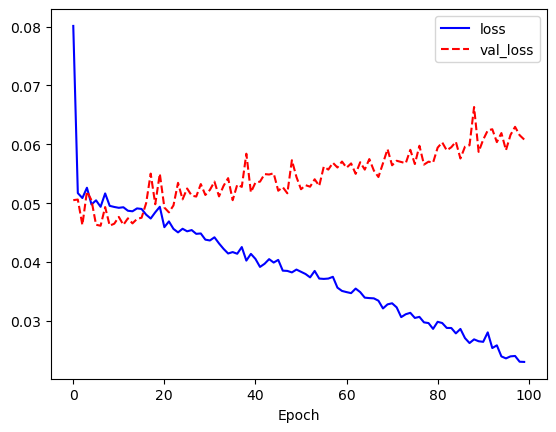

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### LMST

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100, 2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 30)           3960      
                                                                 
 lstm_4 (LSTM)               (None, 30)                7320      
                                                                 
 dense_10 (Dense)            (None, 1)                 31        
                                                                 
Total params: 11311 (44.18 KB)
Trainable params: 11311 (44.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 41ms/step - loss: 0.0545 - val_loss: 0.0462
Epoch 2/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0495 - val_loss: 0.0460
Epoch 3/100
64/64 [==============================] - 2s 35ms/step - loss: 0.0493 - val_loss: 0.0462
Epoch 4/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0493 - val_loss: 0.0459
Epoch 5/100
64/64 [==============================] - 2s 34ms/step - loss: 0.0490 - val_loss: 0.0460
Epoch 6/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0491 - val_loss: 0.0459
Epoch 7/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0494 - val_loss: 0.0461
Epoch 8/100
64/64 [==============================] - 2s 33ms/step - loss: 0.0491 - val_loss: 0.0459
Epoch 9/100
64/64 [==============================] - 2s 34ms/step - loss: 0.0490 - val_loss: 0.0473
Epoch 10/100
64/64 [==============================] - 2s 32ms/step - loss: 0.0491 - val_loss: 0.0458

### 학습 loss와 검증 loss는 모두 점차 떨어진다, 괜찮은 모델 구성

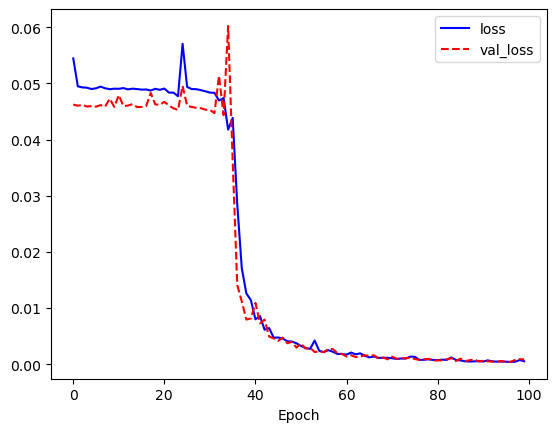

In [ ]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### 감성분석 Sentiment Analysis
- 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제
- 이중 문장의 긍정/부정 등을 구분하는 경우가 많음

In [23]:
path_to_train_file = '/content/drive/MyDrive/제로베이스_코랩/RNN_data/ratings_train.txt'
path_to_test_file = '/content/drive/MyDrive/제로베이스_코랩/RNN_data/ratings_test.txt'

In [24]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

In [25]:
print('Length of text : {} charectors'.format(len(train_text)))
print('Length of text : {} charectors'.format(len(test_text)))
print()

print(train_text[:300])

Length of text : 6937271 charectors
Length of text : 2318260 charectors

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [26]:
# 줄바꿈 전처리
test_text.split('\n')
test_text.split('\n')[:3]

['id\tdocument\tlabel', '6270596\t굳 ㅋ\t1', '9274899\tGDNTOPCLASSINTHECLUB\t0']

In [27]:
#탭 문자 삭제
test_text.split('\n')[1].split('\t')

['6270596', '굳 ㅋ', '1']

### train, test의 label

In [28]:
import numpy as np

train_Y = np.array([[int(row.split('\t')[2])]
                    for row in train_text.split('\n')[1:] if row.count('\t') > 0])
                                # train_text.split('\n')[1:] : train_text의 시작이 id, document, label 이므로 이부분은 제외
                                # if row.count('\t') > 0 : "탭의 갯수가 0개 이상이라면" 의 조건
test_Y = np.array([[int(row.split('\t')[2])]
                    for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


### tokenizer : 자연어를 처리 가능한 최소의 단위로 나누는 것으로 형태소 분석이 기본이지만 여기선 띄어쓰기로 설정
### cleaning : 불필요한 기호 제거 의미

In [29]:
import re

def clean_str(string):
    string = re.sub(r"[^가-힣A-za-z0-9(),!?\'\`]", " ", string)
                    # [^...]는 대괄호 안에 있는 문자들을 제외한 문자를 의미
                    # 가-힣은 한글 문자 범위를 나타내며, A-Za-z는 영문 대소문자 의미
                    # 0-9는 숫자를, !?\'\`는 느낌표, 물음표, 작은 따옴표, 역따옴표 의미
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'11", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \ ?", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


In [30]:
train_text_X = [row.split('\t')[1]
                for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


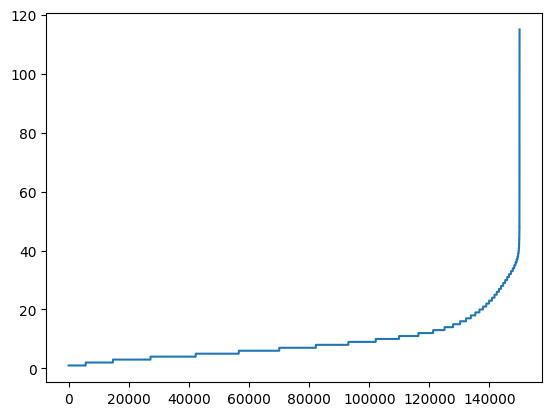

142403


In [31]:
import matplotlib.pyplot as plt

sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

- 15만개의 문장 중에 14만개 정도가(대부분이) 40 단어 이하로 되어 있다

### 데이터 크기 맞추기
- 학습을 위해 네트워크에 입력을 넣을 때 입력 데이터는 그 크기가 같아야 한다
- 입력 벡터의 크기를 맞춰줘야 한다
- 여기서 25개 단어 이상은 긴 문장은 줄이고 25개 이하의 짧은 문장은 공백으로 채우자

In [32]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25]) # 25개 까지만 자르는 설정

sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


### 토크나이징과 패딩
 - pad_sequences : 이 설정을 통해 25개 단어로 설정
 - 시퀀스의 길이를 조절하여 모든 시퀀스가 동일한 길이를 갖도록 합니다.
 - 일반적으로 뒷부분에 패딩이 추가되며, 'post' 옵션을 사용하여 이를 지정

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding = 'post')

print(train_X[:5])

[[   26   880     9  6365  1105     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  592  6068 73571 73572  6690 31918     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [73573     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [25248 73574    73   350    32    36 10440     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [43909 43910   109  5333     4     2  2162 73575   865 25249 73576   583
  73577     0     0     0     0     0     0     0     0     0     0     0
      0]]


### 모델 구성
### Embedding
- 자연어를 수치화된 정보로 바꾸기 위한 레이어
- 자연어는 시간의 흐름에 따라 정보가 연속적으로 이어지는 시퀀스 시스템
- 영어는 문자 단위, 한글은 문자를 넘어 자소(문자를 이루는 최소 단위) 단위로도 쪼개진다
- 혹은 띄어쓰기나 형태소로 나누기도 함
- 여러 단어로 묶어서 사용하는 n_gram 방식도 있음
- 여기에 원핫인코딩까지 포함

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6070302 (23.16 MB)
Trainable params: 6070302 (23.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습

In [35]:
train_X[0]

array([  26,  880,    9, 6365, 1105,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0], dtype=int32)

In [36]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128,
                    validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 55s 55ms/step - loss: 0.4317 - accuracy: 0.7852 - val_loss: 0.3785 - val_accuracy: 0.8226
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.3230 - accuracy: 0.8487 - val_loss: 0.3912 - val_accuracy: 0.8180
Epoch 3/5
938/938 [==============================] - 11s 12ms/step - loss: 0.2692 - accuracy: 0.8705 - val_loss: 0.4341 - val_accuracy: 0.8132
Epoch 4/5
938/938 [==============================] - 9s 10ms/step - loss: 0.2250 - accuracy: 0.8905 - val_loss: 0.4669 - val_accuracy: 0.8116
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.1912 - accuracy: 0.9050 - val_loss: 0.5694 - val_accuracy: 0.8062


### 테스트

In [37]:
test_sentence = '재미있을 줄 알았는데 완정 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []

for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])

test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx , sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

1/1 [==============================] - 0s 412ms/step
['재미있을']
[0.2999058  0.70009416]
['재미있을', '줄']
[0.25835103 0.74164903]
['재미있을', '줄', '알았는데']
[0.3086827  0.69131726]
['재미있을', '줄', '알았는데', '완정']
[0.31078362 0.68921643]
['재미있을', '줄', '알았는데', '완정', '실망했다.']
[0.31078362 0.68921643]
['재미있을', '줄', '알았는데', '완정', '실망했다.', '너무']
[0.3092256  0.69077444]
['재미있을', '줄', '알았는데', '완정', '실망했다.', '너무', '졸리고']
[0.9396835 0.0603165]
['재미있을', '줄', '알았는데', '완정', '실망했다.', '너무', '졸리고', '돈이']
[0.9989145  0.00108552]
['재미있을', '줄', '알았는데', '완정', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.9989145  0.00108552]
